In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error as mae

In [2]:
data_path = "./house-prices-advanced-regression-techniques/"

train = pd.read_csv(f"{data_path}/train.csv")
test = pd.read_csv(f"{data_path}/test.csv")

df = train

In [3]:
def df_transform_ordinals(data: pd.DataFrame, ordinal_features: dict) -> pd.DataFrame:
    data
    
    for feature, categories in ordinal_features.items():
        if feature in df.columns:  # Проверяем, есть ли столбец в данных
            data[feature] = pd.Categorical(data[feature], categories=categories, ordered=True)
            data[feature] = data[feature].cat.codes
        else:
            print(f"⚠️ Warning: Признак {feature} отсутствует в данных")
    
    return data

In [4]:
# Числовые признаки
numerical_features = [
    "LotFrontage", "LotArea", "YearBuilt", "YearRemodAdd", "MasVnrArea", 
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
    "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", 
    "FullBath", "HalfBath", "KitchenAbvGr", "TotRmsAbvGrd", 
    "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", 
    "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", 
    "MiscVal", "MoSold", "YrSold", "BedroomAbvGr", "OverallQual", "OverallCond"
]

# Категориальные признаки
label_features = [
    "MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", 
    "Utilities", "LotConfig", "Neighborhood", "Condition1", "Condition2", 
    "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", 
    "Exterior2nd", "MasVnrType", "Foundation", "Heating", "CentralAir", 
    "Electrical", "GarageType", "MiscFeature", "SaleType", "SaleCondition"
]

# Порядковые признаки
ordinal_features_old = [
    "LandSlope", "OverallQual", "OverallCond", "ExterQual", "ExterCond", 
    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
    "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", 
    "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence"
]

ordinal_features = {
    "ExterQual": ["Po", "Fa", "TA", "Gd", "Ex"],  # Poor → Fair → Typical → Good → Excellent
    "ExterCond": ["Po", "Fa", "TA", "Gd", "Ex"],  # Poor → Fair → Typical → Good → Excellent

    "BsmtQual": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],  # No Basement → Poor → Fair → Typical → Good → Excellent
    "BsmtCond": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],  # Аналогично
    "BsmtExposure": ["NA", "No", "Mn", "Av", "Gd"],  # No Basement → No Exposure → Minimum → Average → Good
    "BsmtFinType1": ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],  # No Basement → Unfinished → Low Quality → Recreation → Below Average → Average → Good
    "BsmtFinType2": ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],  # Аналогично

    "HeatingQC": ["Po", "Fa", "TA", "Gd", "Ex"],  # Poor → Fair → Typical → Good → Excellent
    "KitchenQual": ["Po", "Fa", "TA", "Gd", "Ex"],  # Poor → Fair → Typical → Good → Excellent
    "Functional": ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"],  
    # Salvage → Severe Damage → Major Issue → Moderate → Minor → Typical
    "FireplaceQu": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],  
    # No Fireplace → Poor → Fair → Typical → Good → Excellent
    "GarageFinish": ["NA", "Unf", "RFn", "Fin"],  # No Garage → Unfinished → Rough Finished → Finished
    "GarageQual": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],  # No Garage → Poor → Fair → Typical → Good → Excellent
    "GarageCond": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],  # Аналогично
    "PavedDrive": ["N", "P", "Y"],  # Dirt/Gravel → Partial Pavement → Paved
    "PoolQC": ["NA", "Fa", "TA", "Gd", "Ex"],  # No Pool → Fair → Typical → Good → Excellent
    # "Fence": ["NA", "MnWw", "GdWo", "MnPrv", "GdPrv"],
    "LandSlope": ["Sev", "Mod", "Gtl"]
}

target = ["SalePrice"]

# Создаем датафреймы для числовых, категориальных и порядковых признаков
numerical_df = df[numerical_features]
label_df = df[label_features]
ordinal_df = df[list(ordinal_features.keys())].fillna("NA")

ordinal_df = df_transform_ordinals(ordinal_df, ordinal_features)

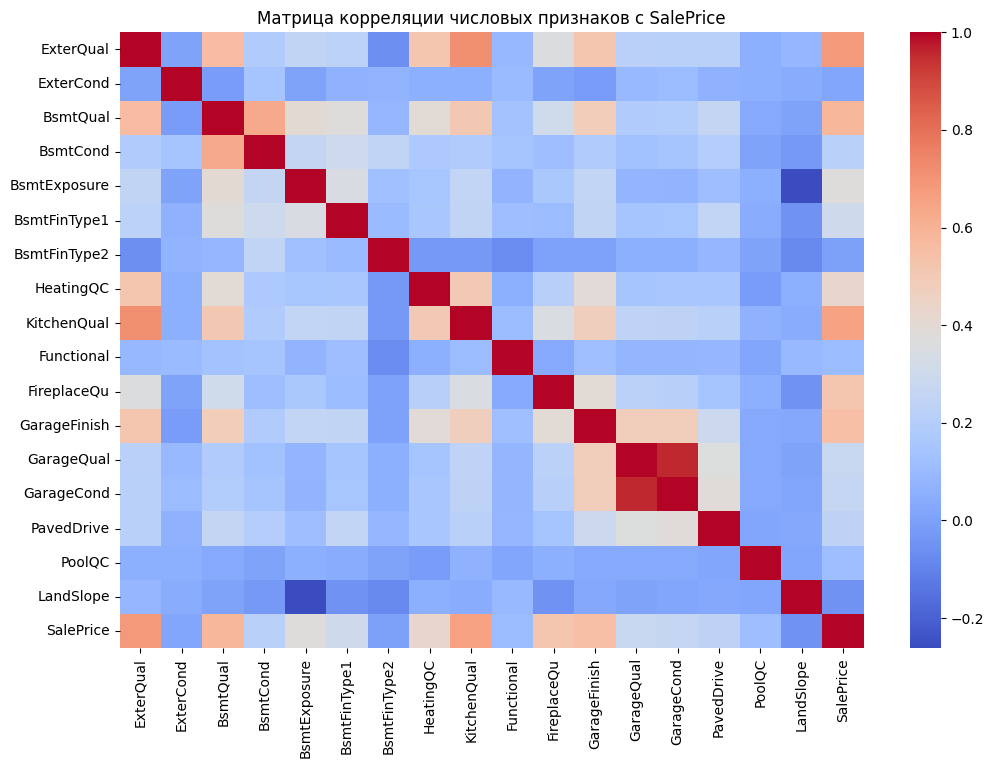

SalePrice       1.000000
ExterQual       0.682639
KitchenQual     0.659600
BsmtQual        0.585207
GarageFinish    0.549247
FireplaceQu     0.520438
HeatingQC       0.427649
BsmtExposure    0.374696
BsmtFinType1    0.304908
GarageQual      0.273839
GarageCond      0.263191
Name: SalePrice, dtype: float64


In [5]:
# Создаем копию датафрейма числовых признаков и добавляем SalePrice
df_ = ordinal_df.copy()

df_["SalePrice"] = df["SalePrice"]

# Строим матрицу корреляции
correlation_matrix = df_.corr()

# Визуализируем корреляцию
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Матрица корреляции числовых признаков с SalePrice')
plt.show()

# Выведем топ-10 наиболее коррелирующих признаков с SalePrice
top_corr_features = correlation_matrix["SalePrice"].sort_values(ascending=False)
print(top_corr_features.head(11))  # Включаем SalePrice + 10 самых коррелирующих признаков

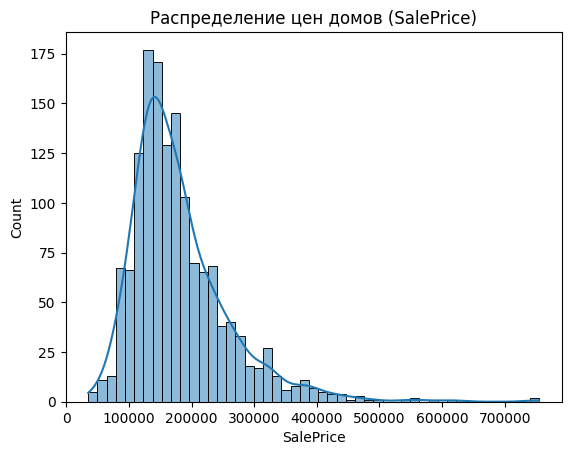

In [6]:
sns.histplot(train.SalePrice, kde=True)
plt.title('Распределение цен домов (SalePrice)')
plt.show()

<Axes: >

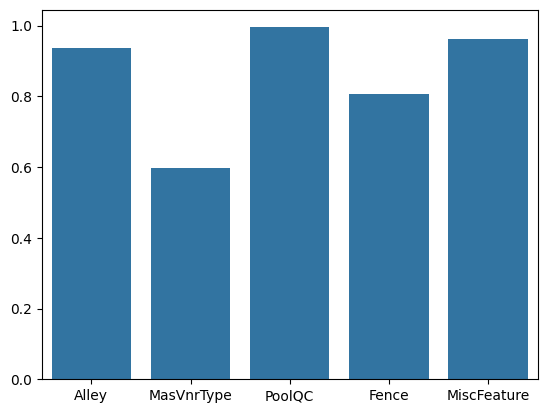

In [7]:
# Процент пропущенных значений в каждом столбце
null_percentage = (train.isnull().sum() / len(train))

# Построим круговую диаграмму
sns.barplot(null_percentage[null_percentage > 0.5])


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    ordinal_df, df.SalePrice, test_size=0.2, random_state=42)

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [11]:
lr_train_mse = mae(y_train, y_lr_train_pred) 
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mae(y_test, y_lr_test_pred) 
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [12]:
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MAE','Training R2','Test MAE','Test R2']

In [13]:
lr_results

,Method,Training MAE,Training R2,Test MAE,Test R2
0,Linear regression,31155.715253,0.658365,33340.19404,0.653846
